In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import h5py

import settings.Constants as const

In [2]:
with h5py.File(const.saddlePointFile, 'r') as f:
    saddle_points = f['SaddlePoint/saddle_points'][:]
    couplingValue = f['SaddlePoint/coupling'][()]
    Tvalue = f['SaddlePoint/T'][()]
    voltageSpacePlot = f['SaddlePoint/voltageSpacePlot'][:]
    lambdaSpacePlot = f['SaddlePoint/lambdaSpacePlot'][:]
    
    phi_voltage = f['SaddlePoint/phi-Voltage'][:]
    
    lambdaSamples = f['SaddlePoint/lambdaSamples'][:]
    voltageSamples = f['SaddlePoint/voltageSamples'][:]
    
    colorsVoltage = f['SaddlePoint/colorsVoltage'][:]
    colorsLambda = f['SaddlePoint/colorsLambda'][:]


phiSamples = saddle_points[:,1]


f.close()

In [3]:
with h5py.File(const.shotNoiseZeroFile, 'r') as f:
    omegaSpaceInt = f['ShotNoise/omegaInt'][:]
    OmegaSpaceNonInt = f['ShotNoise/omegaNonInt'][:]
    voltageSpace = f['ShotNoise/voltageSpace'][:]
    
    retardedNonInt = f['ShotNoise/retardedNonInt'][:]
    retardedInt = f['ShotNoise/retardedInt'][:]
    
    keldyshNonInt = f['ShotNoise/keldyshNonInt'][:]
    keldyshInt = f['ShotNoise/keldyshInt'][:]
    
f.close()

keldyshTotal = keldyshNonInt[:,:].real - keldyshInt[:,:].imag
retardedTotal = retardedNonInt[:,:].real - 2*retardedInt[:,:].imag



In [4]:
print(keldyshTotal.shape)
print(retardedTotal.shape)
print(omegaSpaceInt.shape)
print(voltageSpace.shape)
print(omegaSpaceInt)

(150, 2)
(150, 2)
(2,)
(150,)
[-0.001  0.001]


In [5]:
FauxPlusTotal = retardedTotal[:,1]/keldyshTotal[:,1]
FauxMinusTotal = retardedTotal[:,0]/keldyshTotal[:,0]

dFomegaTotal = (FauxPlusTotal - FauxMinusTotal)/(2*2e-3)

FauxPlusNonInt = retardedNonInt[:,1].real/keldyshNonInt[:,1].real
FauxMinusNonInt = retardedNonInt[:,0].real/keldyshNonInt[:,0].real

dFomegaNonInt = (FauxPlusNonInt - FauxMinusNonInt)/(2*2e-3)

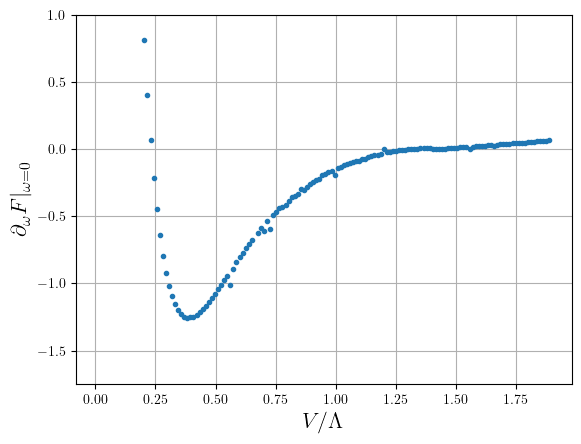

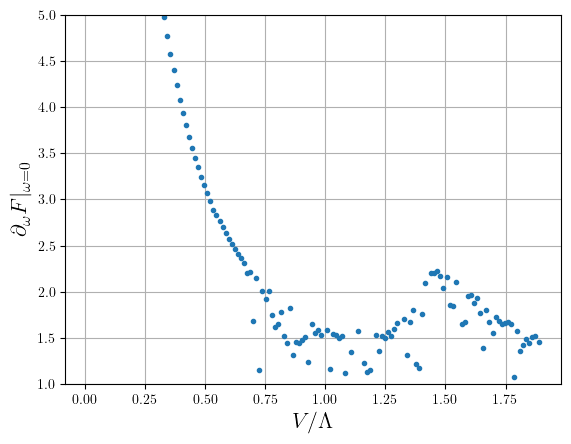

In [9]:
plt.figure()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.plot(voltageSpace[1:-1], dFomegaTotal[1:-1], '.')
plt.grid()
# plt.yscale('log')
plt.xlabel(r'$V/\Lambda$', fontsize=16)
plt.ylabel(r'$\partial_{\omega} F |_{\omega=0}$', fontsize=16) 
# plt.yscale('log')
plt.ylim(-1.75, 1)
plt.savefig("figures/dFomegaTotalV2.pdf")

plt.figure()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.plot(voltageSpace[1:-1], dFomegaNonInt[1:-1], '.')
plt.grid()
# plt.yscale('log')
plt.ylim(1, 5.0)
# plt.xlim(0.5, 1.5)
plt.xlabel(r'$V/\Lambda$', fontsize=16)
plt.ylabel(r'$\partial_{\omega} F |_{\omega=0}$', fontsize=16) 
plt.savefig("figures/dFomegaNonIntV2.pdf")

In [7]:

### Coef Exponent near divergence

# maskVoltage = voltageSpace >= voltageSamples[2]

# voltageSpaceUpper = voltageSpace[maskVoltage] - voltageSamples[2]
# keldyshTotalUpper = keldyshTotal[maskVoltage]

# logAbsVoltage = np.log(np.abs(voltageSpaceUpper))[1:-80]
# logAbsKeldysh = np.log(np.abs(keldyshTotalUpper))[1:-80]


# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(logAbsVoltage, logAbsKeldysh)
# print(f"Slope: {slope}, Intercept: {intercept}, R^2: {r_value**2}")



# plt.plot(logAbsVoltage, logAbsKeldysh, '.')
# plt.plot(logAbsVoltage, slope*logAbsVoltage + intercept, 'r')
# plt.grid()
# plt.show()